In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid')

In [5]:
df = pd.read_csv('netflix_titles.csv')
print("Dataset loaded successfully! Number of rows:", len(df))

df.head()

Dataset loaded successfully! Number of rows: 8807


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'] = df['cast'].fillna('No Data')
df['director'] = df['director'].fillna('No Data')

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dropna(subset=['date_added'], inplace=True)

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

print("Data cleaned. Remaining rows:", len(df))

Data cleaned. Remaining rows: 8790


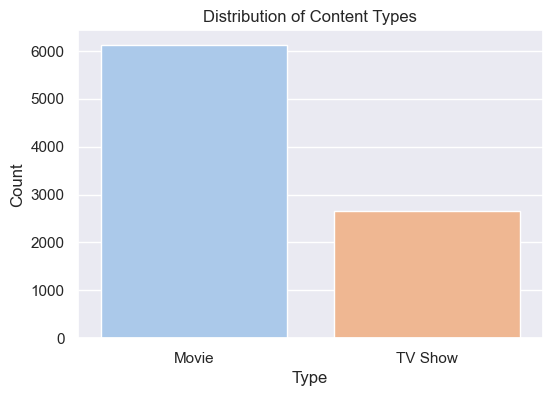

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', hue='type', palette='pastel', legend=False)
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

country
United States     3638
India              972
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


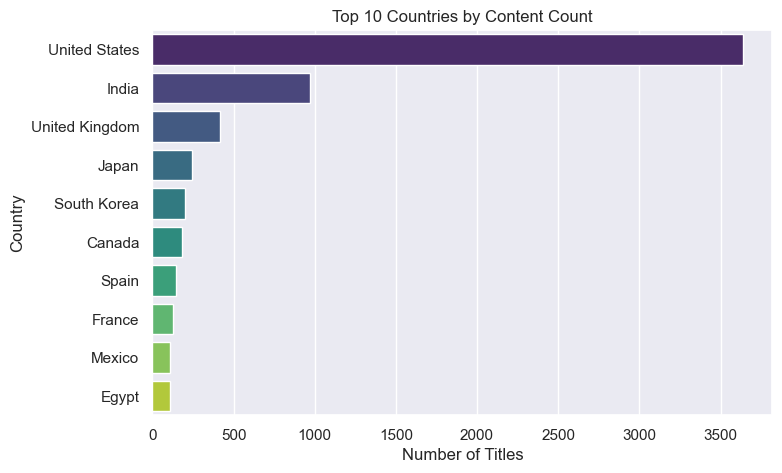

In [23]:
top_countries = df['country'].value_counts().head(10)
print(top_countries)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, 
            hue=top_countries.index, palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64


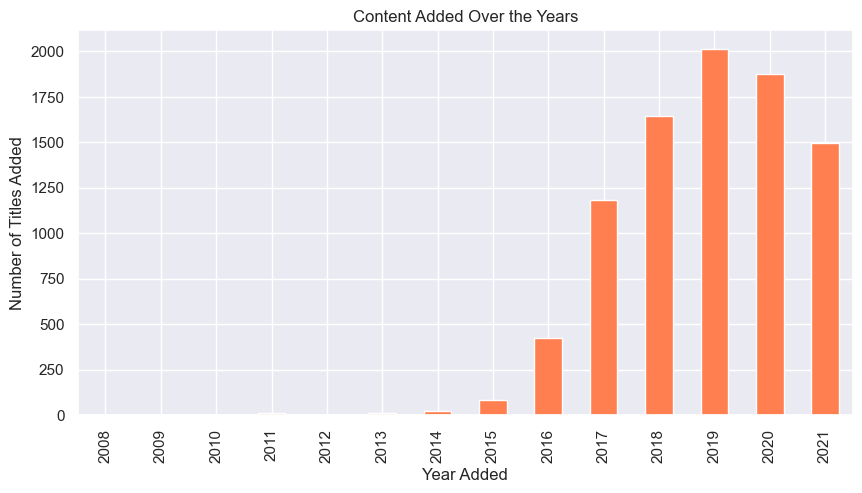

In [24]:
year_counts = df['year_added'].value_counts().sort_index()
print(year_counts)

plt.figure(figsize=(10,5))
year_counts.plot(kind='bar', color='coral')
plt.title('Content Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.show()

                      Genre  Count
0      International Movies   2752
1                    Dramas   2426
2                  Comedies   1674
3    International TV Shows   1349
4             Documentaries    869
5        Action & Adventure    859
6                 TV Dramas    762
7        Independent Movies    756
8  Children & Family Movies    641
9           Romantic Movies    616


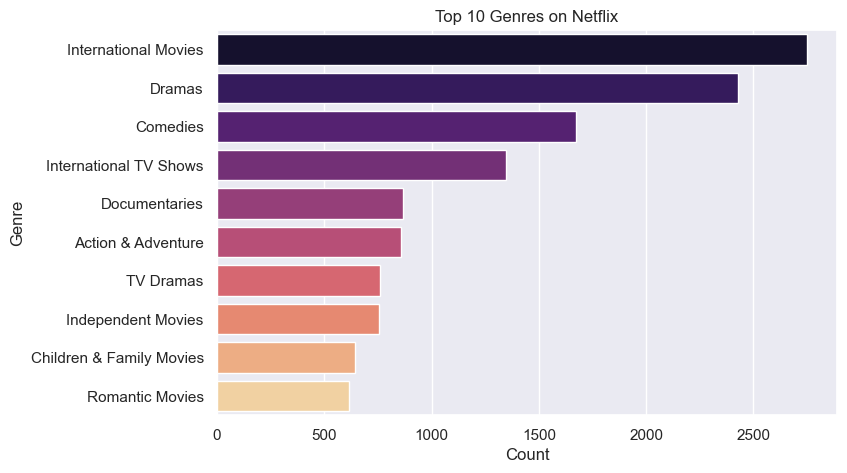

In [26]:
genres = df['listed_in'].str.split(', ')
genre_counts = Counter([g for sublist in genres.dropna() for g in sublist])
top_genres = genre_counts.most_common(10)

genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])
print(genres_df)

plt.figure(figsize=(8,5))
sns.barplot(data=genres_df, x='Count', y='Genre', palette='magma', hue='Genre', legend=False)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

type
Movie      99.584884
TV Show     1.751877
Name: duration_int, dtype: float64


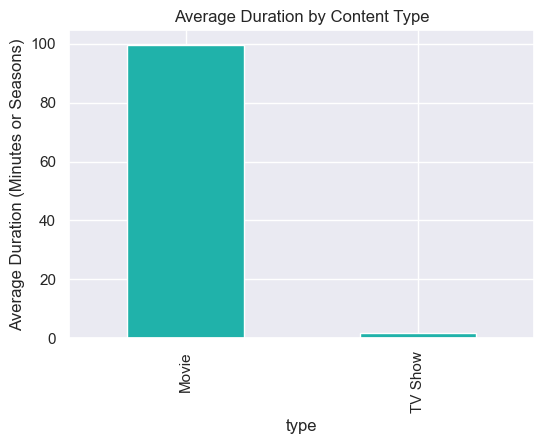

In [28]:
df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract(r'([a-zA-Z]+)')

avg_duration = df.groupby('type')['duration_int'].mean()
print(avg_duration)

plt.figure(figsize=(6,4))
avg_duration.plot(kind='bar', color='lightseagreen')
plt.title('Average Duration by Content Type')
plt.ylabel('Average Duration (Minutes or Seasons)')
plt.show()

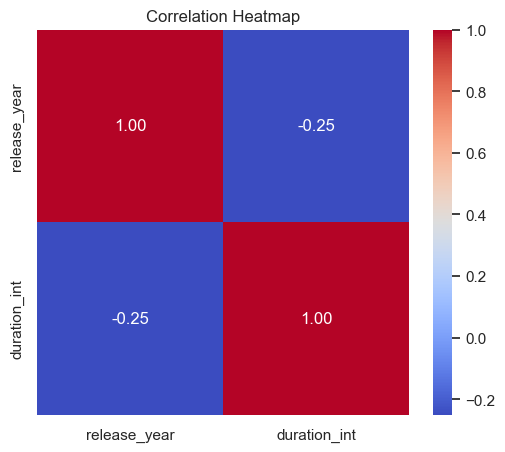

In [29]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [30]:
df.describe()

,date_added,release_year,year_added,month_added,duration_int
count,8790,8790.000000,8790.000000,8790.000000,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163,2018.873606,6.655859,69.934471
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2018.000000,4.000000,2.000000
50%,2019-07-03 00:00:00,2017.000000,2019.000000,7.000000,88.500000
75%,2020-08-19 18:00:00,2019.000000,2020.000000,10.000000,106.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000,312.000000
std,NaN,8.825466,1.573568,3.436103,50.794433
